In [1]:
# Ensemble : Model들을 같이 엮어서 사용하는 방법 

In [2]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [10]:
# Sampling p = 0.7, 0.75, 0.8 이 가장 많이 사용됨
library(caret)
set.seed(1234)
samp <- createDataPartition(iris$Species, p=0.7, list=F)


In [11]:
# 학습용 데이터 만들기
data.tr <- iris[samp,]

# 검증용 데이터 만들기
data.test <- iris[-samp,]

# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [12]:
# 학습 시키기                                            ctree 사용갯수
model.rf <- randomForest(Species ~ ., data = data.tr, ntree = 100)

In [13]:
# 검증하기
pred <- predict(model.rf, x)

In [14]:
# 예측력과 오분류표
mean(pred == y)
table(pred, y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기 (회귀식과 RandomForest 예측 비교)

In [15]:
seoul <- read.csv("../Data/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [16]:
summary(seoul)

      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [24]:
# 종로구 데이터셋 만들기
jongro <- seoul[seoul$자치구명 == '종로구',]

head(jongro)
tail(jongro)

# factor 정리
jongro$자치구명 <- factor(jongro$자치구명)

str(jongro)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2407,2019,7,종로구,83,0,109
2408,2019,8,종로구,115,0,164
2409,2019,9,종로구,99,0,143
2410,2019,10,종로구,104,0,139
2411,2019,11,종로구,100,0,126
2412,2019,12,종로구,100,0,142


'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [25]:
# row names 정리하기
rownames(jongro) <- c()
tail(jongro)

,년도,월,자치구명,발생건수,사망자수,부상자수
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [26]:
# 종로의 발생건수와 부상자수 상관계수

cor(jongro$발생건수, jongro$부상자수)

[1] 0.9208914

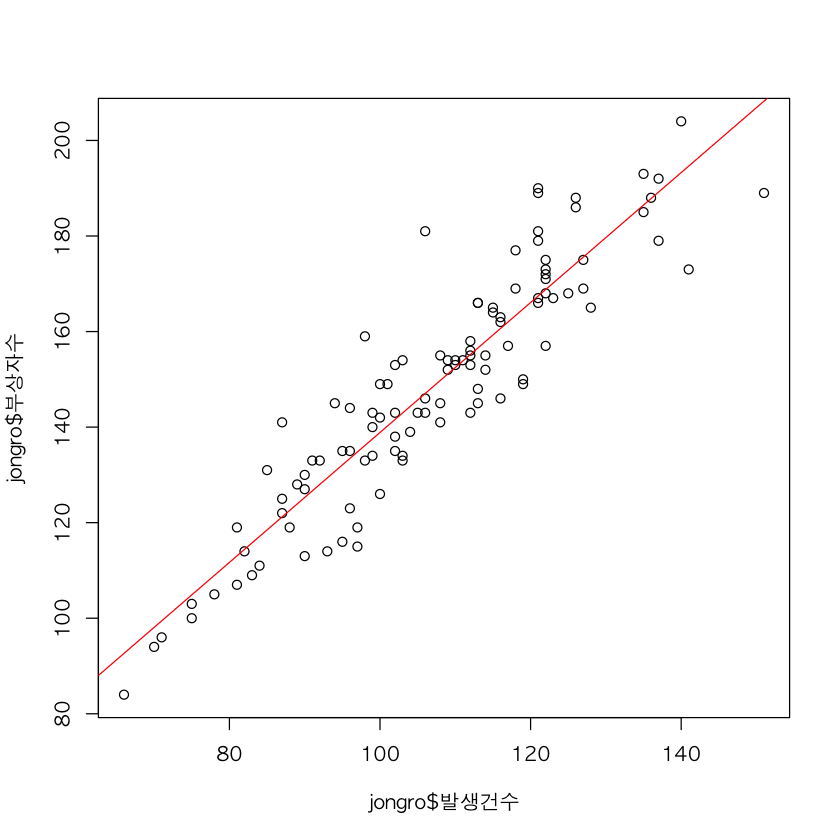

In [36]:
# 종로구의 발생건수와 부상자수의 산포도와 회귀선 그리기

options(warn = -1)

par(family = "AppleGothic")
plot(jongro$부상자수 ~ jongro$발생건수)

r <- lm(jongro$부상자수 ~ jongro$발생건수)
abline(r, col = 'red')


In [37]:

# 예측력

options(scipen = 100)
summary(r)
r


Call:
lm(formula = jongro$부상자수 ~ jongro$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value            Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477               0.635    
jongro$발생건수  1.35993    0.05591  24.322 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = jongro$부상자수 ~ jongro$발생건수)

Coefficients:
    (Intercept)  jongro$발생건수  
          2.886            1.360  


In [132]:
# 회귀식



# - 발생건수가 100건일 경우의 부상자수 예측
y = 1.35993*200
y
cat(y-9.816, "~", y+9.816)

[1] 271.986

262.17 ~ 281.802

In [134]:
step(r, direction = "backward")

Start:  AIC=495.34
jongro$부상자수 ~ jongro$발생건수

                  Df Sum of Sq   RSS    AIC
<none>                         10215 495.34
- jongro$발생건수  1     57004 67219 696.83



Call:
lm(formula = jongro$부상자수 ~ jongro$발생건수)

Coefficients:
    (Intercept)  jongro$발생건수  
          2.886            1.360  


In [127]:
# 랜덤 포레스트로 예측
# - 발생건수가 100건일 경우의 부상자수 예측
set.seed(1234)



In [128]:

model.rf <- randomForest(부상자수 ~ 발생건수, data = jongro, ntree = 100)

발생건수 = 200
x <- data.frame(발생건수)

pred2 <- predict(model.rf, x)

In [129]:
pred2

1 
184.4187